In [14]:
# Setup
library(dplyr)
library(ggplot2)
library(forcats)
library(gt)
library(gghighlight)
library(quartomonothemer)
library(showtext)
library(sysfonts)   # menangani file font

font_add_google("Noto Sans",       "noto")        # alias 'noto'
font_add_google("Montserrat",      "mont")        # alias 'mont'
font_add_google("Josefin Sans",    "josefin")     # alias 'josefin'

font_title <- "Josefin Sans"
font_text <- "Montserrat"
font_sans <- "Noto Sans" 
color_base <- "#009F8C"
color_base_light <- "#95DFD6"
color_accent <- "#B75C9D"
color_accent_light <- "#DBA6CC"
gray <- "#bebebe"
darkgray <- "#6d6d6d"

showtext_auto()

style_mono_quarto(
  font_title = font_title,
  font_text = font_text,
  font_sans = font_sans,
  color_base = color_base,
  color_accent = color_accent,
  color_link = color_accent,
  color_code = color_base,
  size_base = 30
)

## Slides 5

In [18]:
# import data from data/slides5.csv
plan_data <- read.csv("data/slides5.csv")
# display the first few rows of the data
# Delte row if NA exists in the 'ques' column
plan_data <- plan_data[!is.na(plan_data$ques), ]

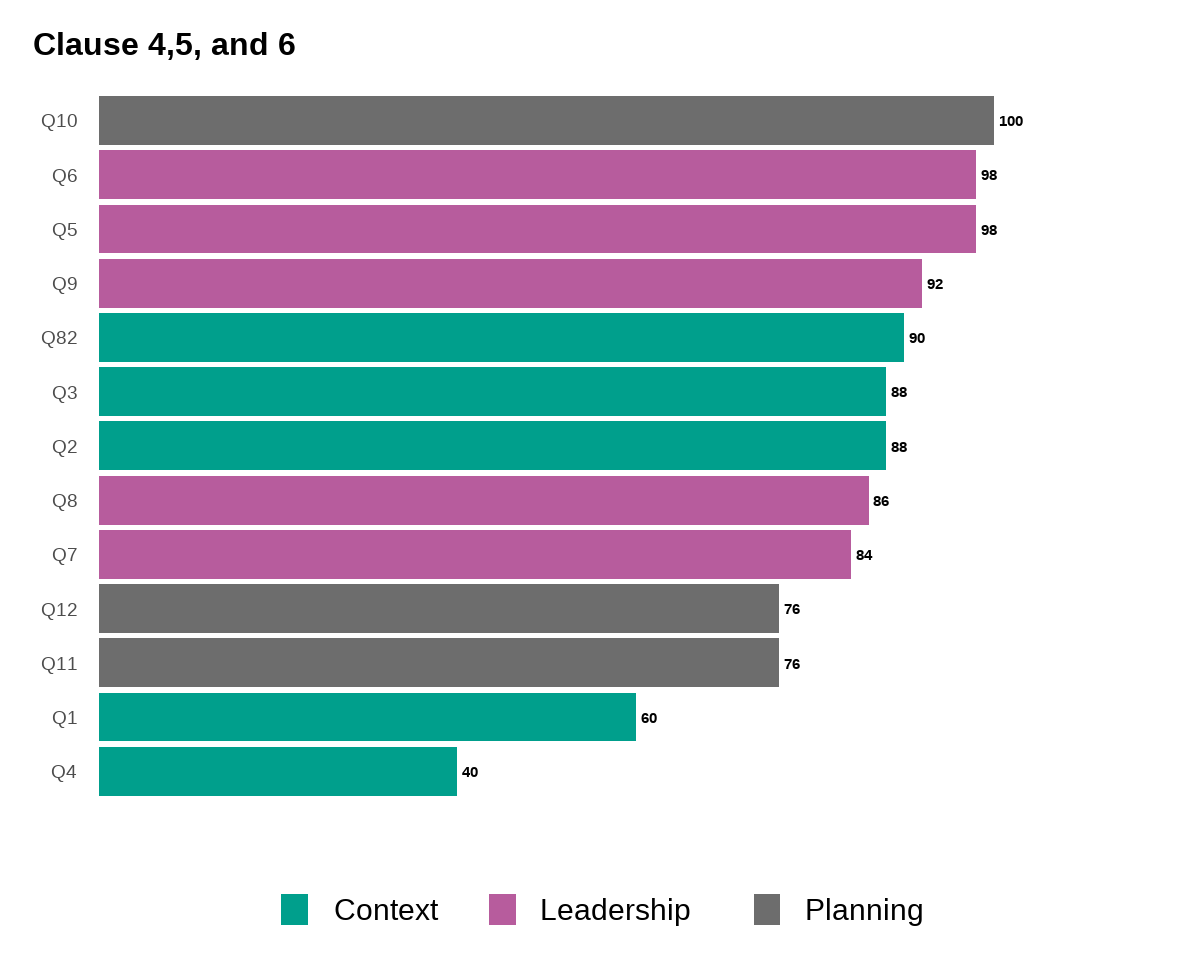

In [19]:
# Making ggplot bar chart with theme_quarto() grouped by 'group'
# Y-axis is 'ques' and X-axis is 'value'

# Set plot dimensions
options(repr.plot.width = 10, repr.plot.height = 8)

# Suppress warnings
options(warn = -1)

# Making ggplot bar chart with theme_quarto() grouped by 'group'
# Y-axis is 'ques' and X-axis is 'value'
plan_data |>
    ggplot(aes(x = value, y = fct_reorder(ques, value), fill = group)) +
    geom_col(position = "dodge") +
    geom_text(aes(label = value),
                        hjust = 0, nudge_x = 0.5,
                        size = 4, fontface = "bold", family = font_text) +
    scale_x_continuous(expand = expansion(mult = c(0, .15))) +
    labs(
        title = "Clause 4,5, and 6",
        x = "",
        y = NULL,
        fill = "Group"
    ) +
    scale_fill_manual(values = c(color_base, color_accent, darkgray)) +
    theme_quarto() +
    theme(
        legend.position = "bottom",
        panel.grid = element_blank(),
        axis.ticks = element_blank(),
        plot.title = element_text(size = 24, face = "bold", family = font_title),
        axis.text.x = element_blank(),
        axis.text.y = element_text(size = 14, family = font_sans),
        plot.margin = margin(20, 40, 20, 20)
    )

# Reset warning options
options(warn = 0)

## Slides 6

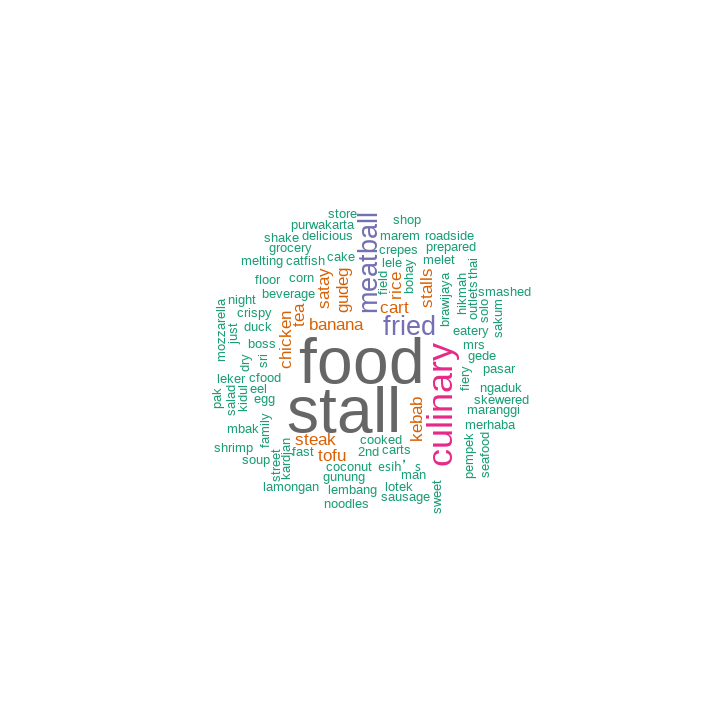

In [27]:
# type of shop
# 'Food''Culinary''Food Outlets''grocery store''Teh bohay kuliner''Warong''Finished Food''Dry food''Food stalls''Stall''Roadside carts''Merhaba Kebab''Warung Lotek Bu Esih''Juragan pempek''Warung Sate Kardjan''Mie baso sakum''Bebek Garang''B & JO Banana Crispy dan Pisang Lilit''Ayam Geprek''FnB''Street food''Rombong Baso Goreng Lembang''Warung Makan "Gudeg Pas Enak"''Ruko nasgor''Kuliner Baso Tahu''Warung Sate Maranggi Purwakarta''Seafood''Belut sawah''Tahu gimbal''Warung Bakso "Marem"''Warung Nasi Gudeg "Mbak Sri"''Pancong lumer 99''Rombong soto lamongab''Jagung Manis Mozarella "Ngaduk"''Thai tea dan sosil telur''Leker Crepes Family''Warung Al Hikmah''Kebab''Evening Culinary''Pasar Gede Lt.2 Solo''Warung  "Lele Melet"''Brawijaya Steak''Warung Makanan cepat saji (matengan) Pak Man Gunung Kidul''Warung Steak and Shake'
# Reset warning options
options(warn = -1)

# Set plot dimensions
options(repr.plot.width = 6, repr.plot.height = 6)

# Load required libraries for word cloud
library(wordcloud)
library(tm)
library(RColorBrewer)

# Extract shop types and remove NAs
shop_types  <- read.csv("data/slides6.csv")

# Create a text corpus
corpus <- Corpus(VectorSource(shop_types))

# Clean the text
corpus <- tm_map(corpus, content_transformer(tolower))
corpus <- tm_map(corpus, removePunctuation)
corpus <- tm_map(corpus, removeWords, stopwords("english"))

# Create a term-document matrix
tdm <- TermDocumentMatrix(corpus)
m <- as.matrix(tdm)
v <- sort(rowSums(m), decreasing=TRUE)
d <- data.frame(word=names(v), freq=v)

# Generate the word cloud
set.seed(1234) # For reproducibility
wordcloud(words=d$word, freq=d$freq, min.freq=1,
          max.words=100, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))
# Reset warning options

options(warn = 0)          

## Slides 7 and 8 

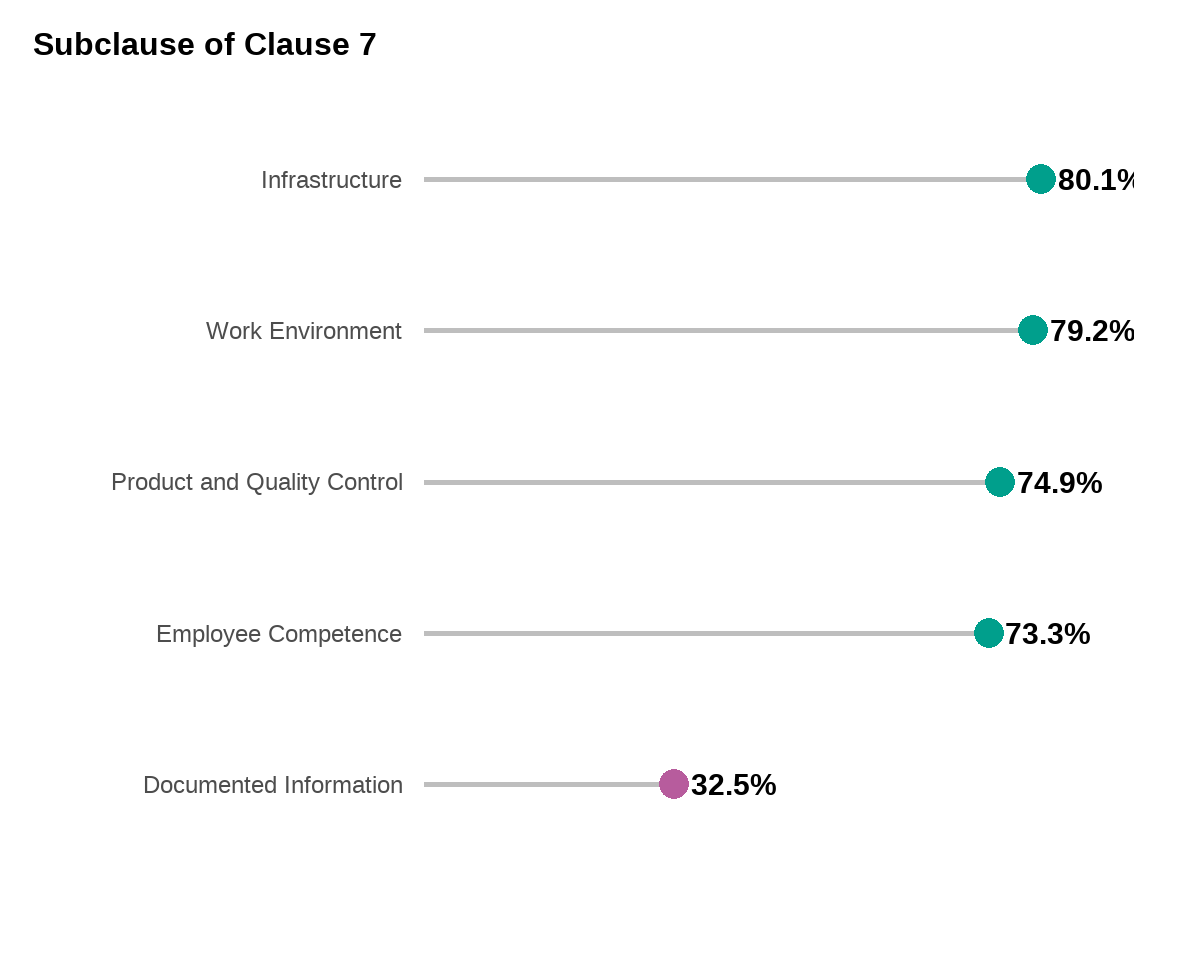

In [40]:
options(warn = -1)
official_data <- read.csv("data/slides7.csv")

# Set plot dimensions
options(repr.plot.width = 10, repr.plot.height = 8)

# Create lollipop chart with custom styling
official_data |>
    ggplot(aes(x = Average_Percentage, y = fct_reorder(Category, Average_Percentage))) +
    geom_segment(aes(x = 0, xend = Average_Percentage, y = Category, yend = Category), 
                 color = gray, size = 1.5) +
    geom_point(aes(color = ifelse(Average_Percentage < 50, color_accent, color_base)), 
               size = 8) +
    geom_text(aes(label = paste0(round(Average_Percentage, 1), "%")),
              hjust = -0.2, size = 8, fontface = "bold", family = font_text) +
    scale_color_identity() +
    scale_x_continuous(expand = expansion(mult = c(0, .15))) +
    labs(
        title = "Subclause of Clause 7",
        x = "",
        y = NULL
    ) +
    theme_quarto() +
    theme(
        panel.grid = element_blank(),
        axis.ticks = element_blank(),
        plot.title = element_text(size = 24, face = "bold", family = font_title),
        axis.text.x = element_blank(),
        axis.text.y = element_text(size = 18, family = font_sans),
        plot.margin = margin(20, 40, 20, 20)
    )

options(warn = 0)

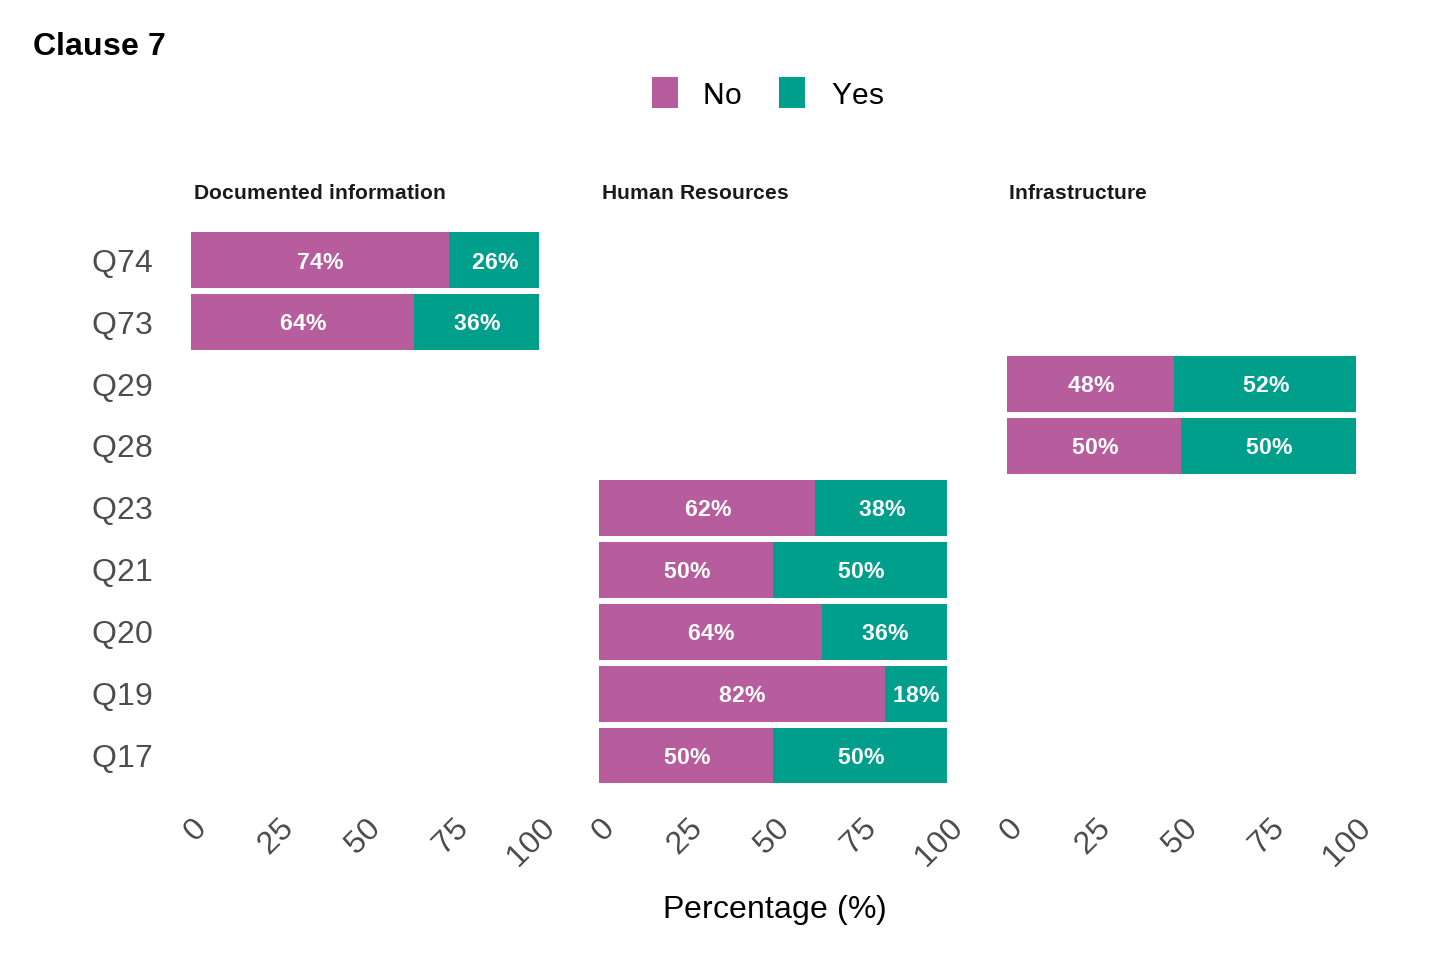

In [48]:
options(warn = -1)

support_data_long <- read.csv("data/slides8.csv")

# Set plot dimensions
options(repr.plot.width = 12, repr.plot.height = 8)

# Reorder the Response factor to put "Yes" first
support_data_long$Response <- factor(support_data_long$Response, levels = c("Yes", "No"))

# Create stacked bar chart with custom styling
ggplot(support_data_long, aes(x = ques, y = Percentage, fill = Response)) +
     geom_bar(stat = "identity") +
     geom_text(aes(label = paste0(round(Percentage, 1), "%")), 
                              position = position_stack(vjust = 0.5), 
                              size = 6, color = "white", fontface = "bold", family = font_text) +
     coord_flip() +
     scale_fill_manual(values = c("Yes" = color_base, "No" = color_accent),
                       guide = guide_legend(reverse = TRUE)) +
     facet_wrap(~ group, scales = "free_x") +
     labs(title = "Clause 7",
                x = "", 
                y = "Percentage (%)",
                fill = "Response") +
     theme_quarto() +
     theme(
          axis.text.x = element_text(angle = 45, hjust = 1, family = font_sans),
          axis.text.y = element_text(family = font_sans),
          strip.text = element_text(face = "bold", family = font_title, size = 16),
          legend.position = "top",
          plot.title = element_text(size = 24, face = "bold", family = font_title),
          panel.grid = element_blank(),
          axis.ticks = element_blank(),
          plot.margin = margin(20, 40, 20, 20)
     )

options(warn = 0)